# Análisis y segmentación de clientes para mejorar la retención en el gimnasio

Analizar y segmentar a los clientes del gimnasio para identificar patrones de uso y factores que influyen en la cancelación de membresías, mejorando así la retención y lealtad.

## Análisis exploratorio de datos (EDA)

- Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).
- Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).
- Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
- Crea una matriz de correlación y muéstrala.

### Librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Buen inicio! Las herramientas seleccionadas y las preguntas planteadas para el análisis exploratorio de datos son adecuadas para el objetivo del proyecto. Estás en el camino correcto para identificar patrones clave. ¡Sigue así! </div>





### EDA

=== Información del Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_tota

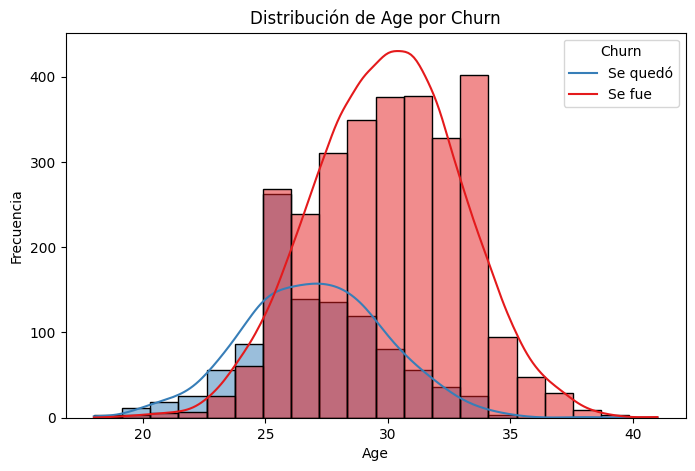

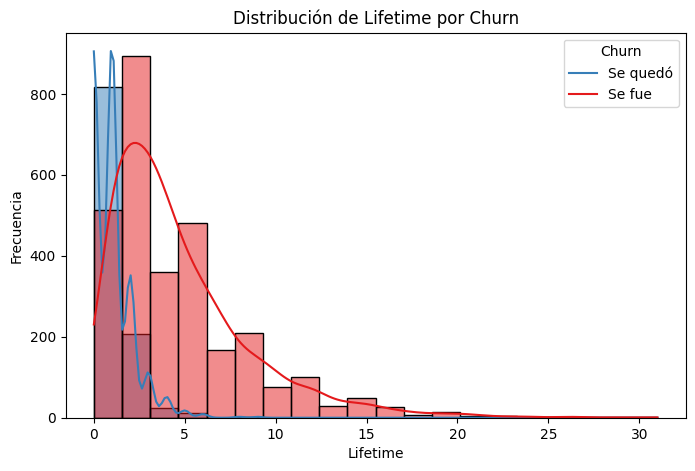

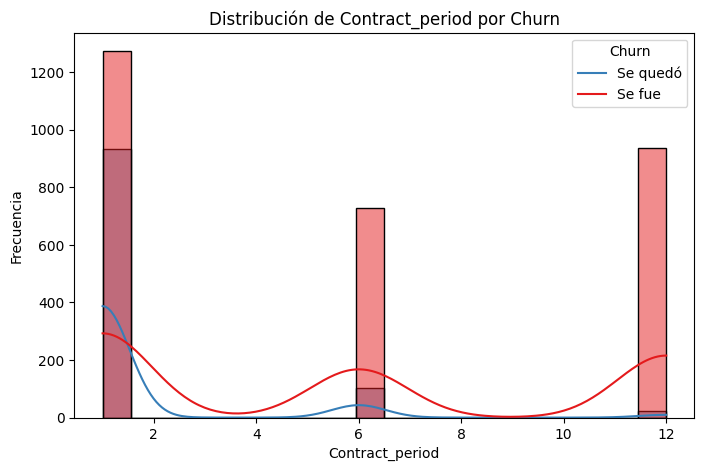

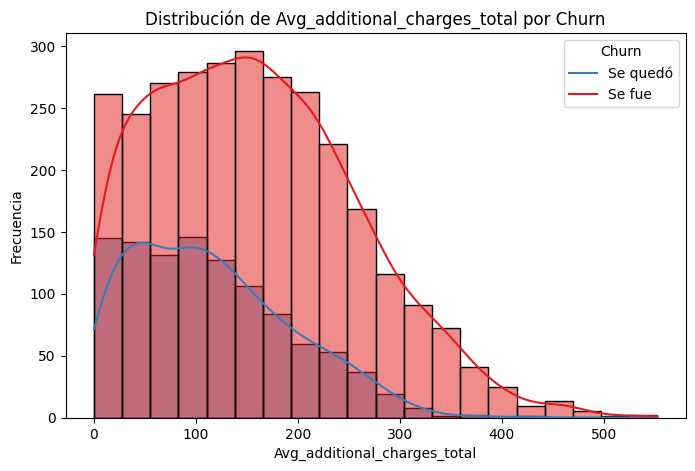

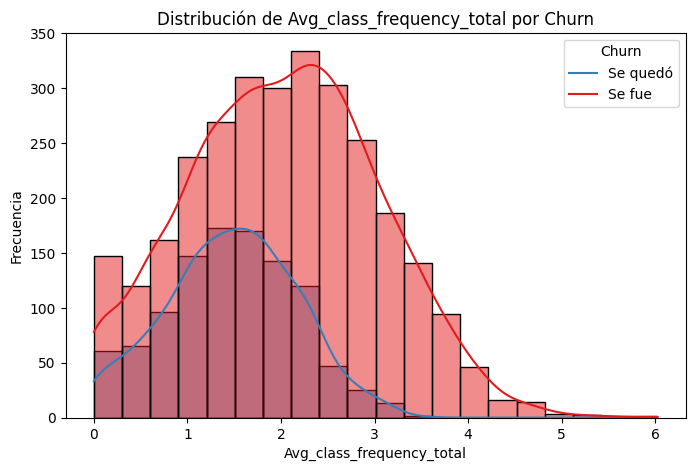

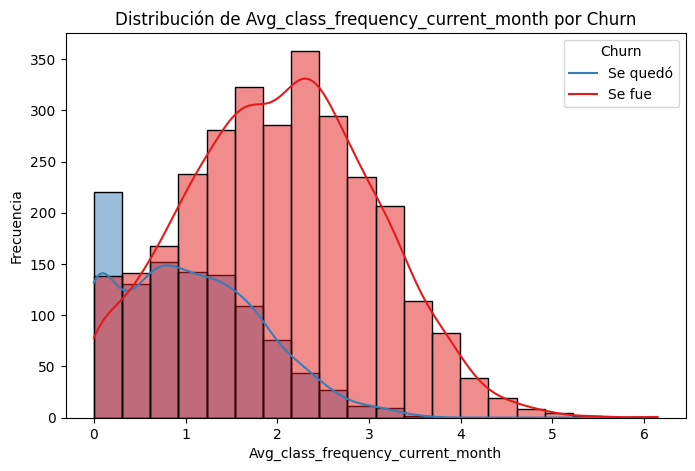

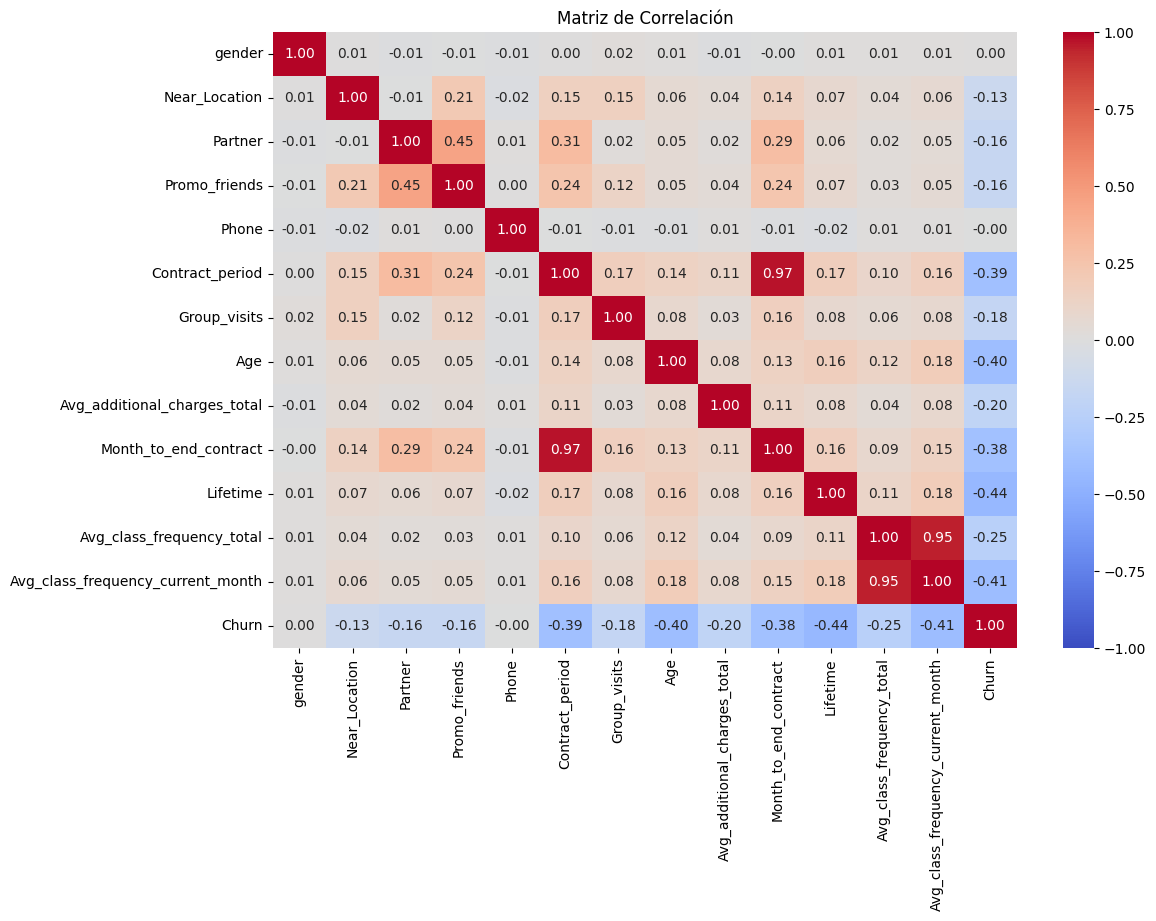

In [3]:
# Cargar los datos
df = pd.read_csv('D:gym_churn_us.csv')

# Información general del dataset
print("=== Información del Dataset ===")
print(df.info())
print("\n=== Resumen Estadístico ===")
print(df.describe())

# Valores medios por grupo (Churn)
group_means = df.groupby('Churn').mean()
print("\n=== Valores medios por grupo (Churn) ===")
print(group_means)

# Histogramas para características seleccionadas
columns_to_plot = ['Age', 'Lifetime', 'Contract_period', 'Avg_additional_charges_total', 
                   'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='Set1', bins=20)
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend(title='Churn', labels=['Se quedó', 'Se fue'])
    plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

- Los clientes que se fueron (Churn=1) tienen diferencias notables en comparación con los que se quedaron (Churn=0):
- Las desviaciones estándar son similares entre ambos grupos, lo que indica una variabilidad comparable en las características analizadas.
- Estas correlaciones sugieren que la duración del contrato y la participación en clases son factores relevantes para retener a los clientes.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Excelente análisis exploratorio de datos! Los histogramas y la matriz de correlación destacan patrones clave que diferencian a los clientes según su estado de cancelación. Además, las observaciones son claras y relevantes para el objetivo del proyecto. ¡Sigue así! </div>

##  Construir un modelo para predecir la cancelación de usuarios

- Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

- Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
- Entrena el modelo en el set de entrenamiento con dos métodos:
-- regresión logística;
-- bosque aleatorio.
- Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?
- Recuerda indicar el parámetro random_state cuando dividas los datos y definas el algoritmo. 

In [4]:
# Paso 1: Separar características y la variable objetivo
X = df.drop('Churn', axis=1)
y = df['Churn']

# Codificar variables categóricas si es necesario
X = pd.get_dummies(X, drop_first=True)

# Paso 2: Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Entrenar los modelos
# Modelo 1: Regresión logística
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_val)

# Modelo 2: Bosque aleatorio
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

# Paso 4: Evaluar los modelos
def evaluate_model(y_true, y_pred, model_name):
    print(f"=== {model_name} ===")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print("\n")

print("\n=== Resultados ===")
evaluate_model(y_val, y_pred_log, "Regresión Logística")
evaluate_model(y_val, y_pred_rf, "Bosque Aleatorio")

# Opcional: Informe completo de clasificación
print("\n=== Informe Completo ===")
print("Regresión Logística:\n", classification_report(y_val, y_pred_log))
print("Bosque Aleatorio:\n", classification_report(y_val, y_pred_rf))


=== Resultados ===
=== Regresión Logística ===
Accuracy: 0.92
Precision: 0.87
Recall: 0.78


=== Bosque Aleatorio ===
Accuracy: 0.91
Precision: 0.85
Recall: 0.78



=== Informe Completo ===
Regresión Logística:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       598
           1       0.87      0.78      0.83       202

    accuracy                           0.92       800
   macro avg       0.90      0.87      0.89       800
weighted avg       0.91      0.92      0.91       800

Bosque Aleatorio:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.85      0.78      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800



Para ambas clases (Churn = 0 y Churn = 1), los modelos son consistentes, aunque la regresión logística parece ser un poco mejor en términos de balance entre precisión y recall.


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Buen trabajo construyendo y evaluando ambos modelos! La comparación de métricas clave como precisión, recall y exactitud está bien estructurada, y la interpretación de los resultados es clara. ¡Sigue así, excelente avance! </div>

## Crear clústeres de usuarios/as

- Estandariza los datos.
- Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.
- Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)
- Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?
- Traza distribuciones de características para los clústeres. ¿Notas algo?
- Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

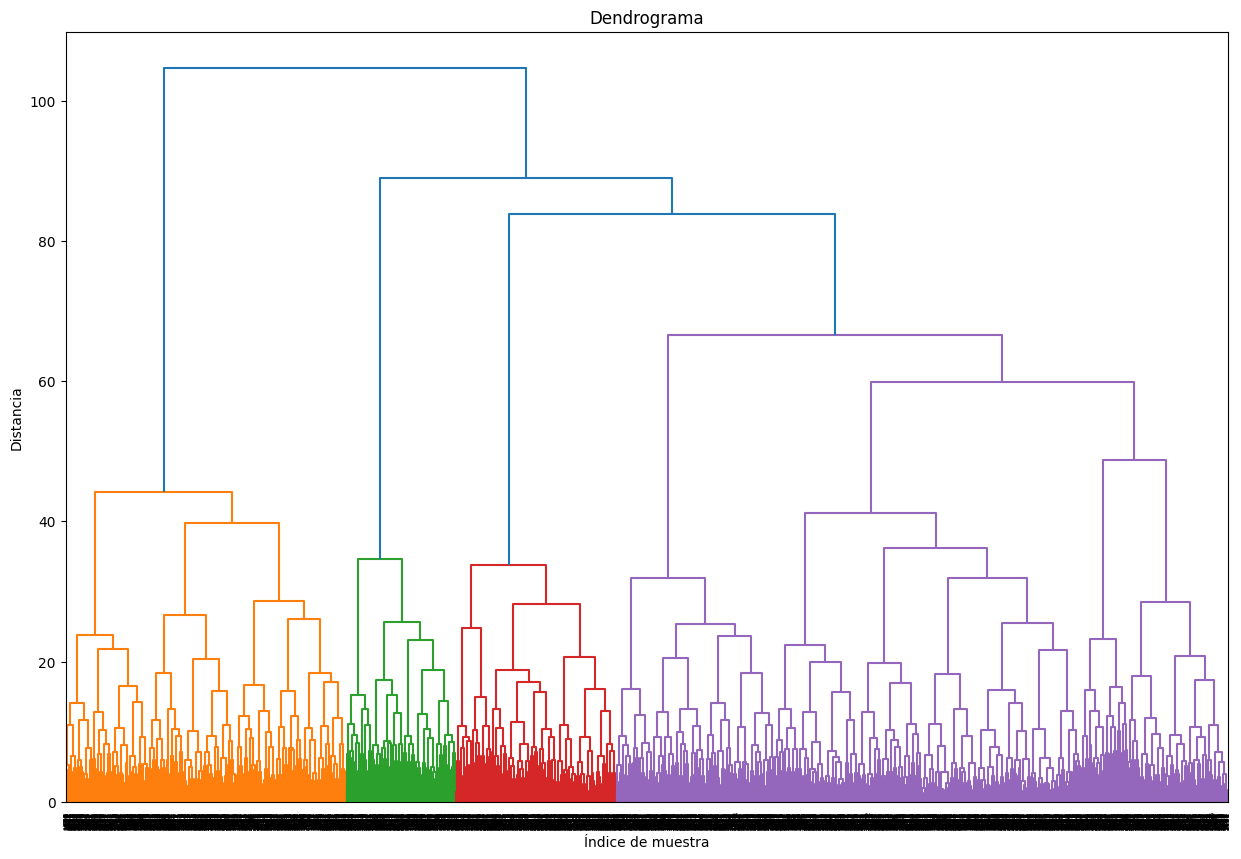

Valores medios por clúster:
           gender  Near_Location   Partner  Promo_friends     Phone  \
Cluster                                                               
0        0.484801       0.698363  0.301637       0.007015  0.899454   
1        0.494471       0.947867  0.791469       0.998420  0.906793   
2        0.464396       0.913313  0.766254       0.493808  0.925697   
3        0.547794       0.937500  0.742647       0.424632  0.863971   
4        0.568233       0.878076  0.178971       0.048098  0.914989   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               1.733437      0.255651  28.074825   
1               2.740916      0.431280  28.903633   
2              10.495356      0.506192  30.091331   
3              11.194853      0.575368  29.720588   
4               2.120805      0.456376  29.993289   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                     

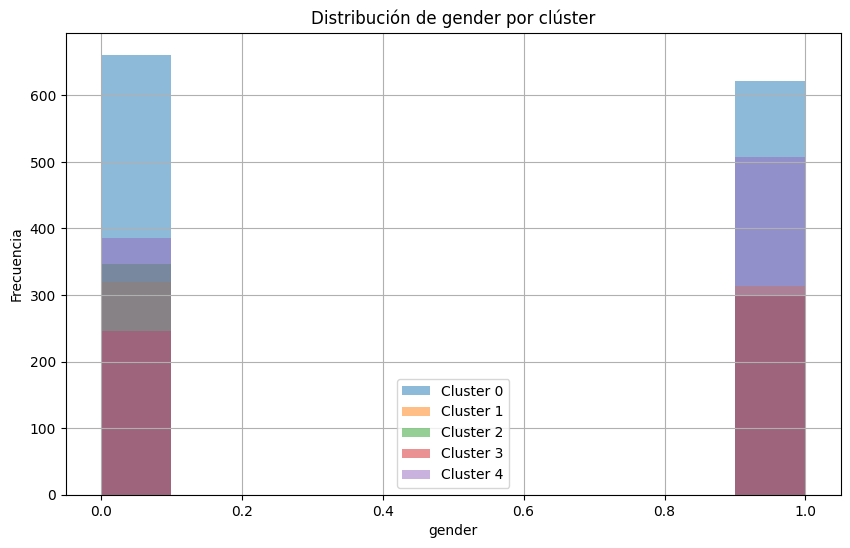

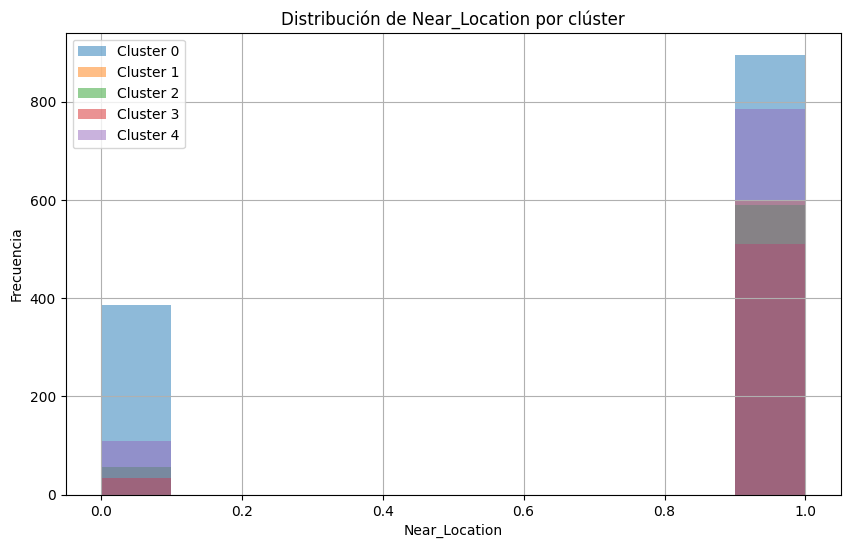

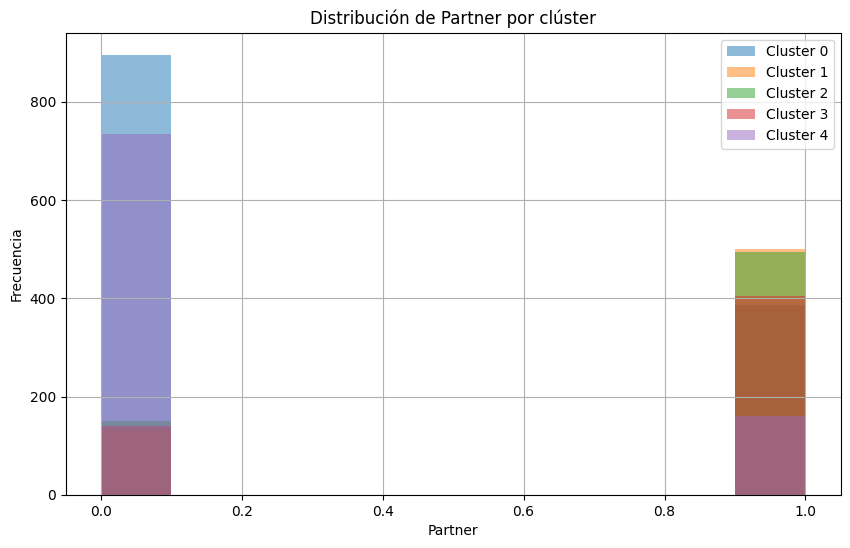

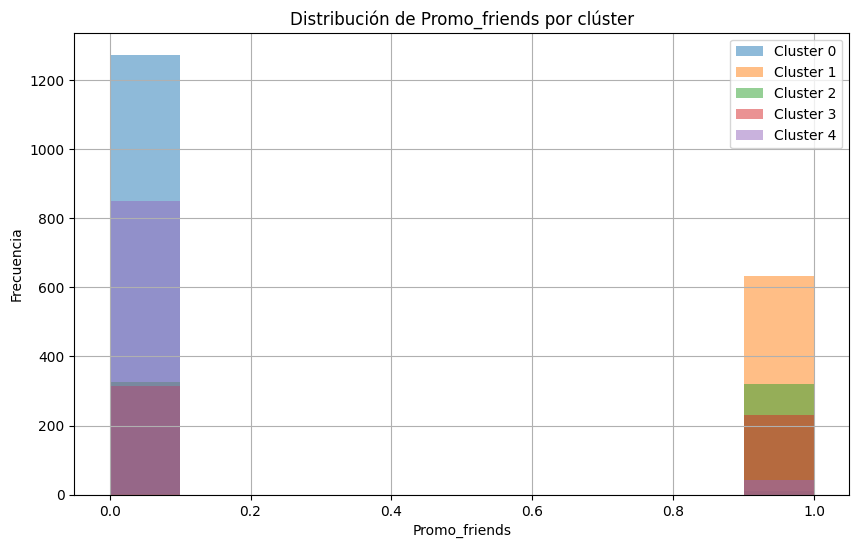

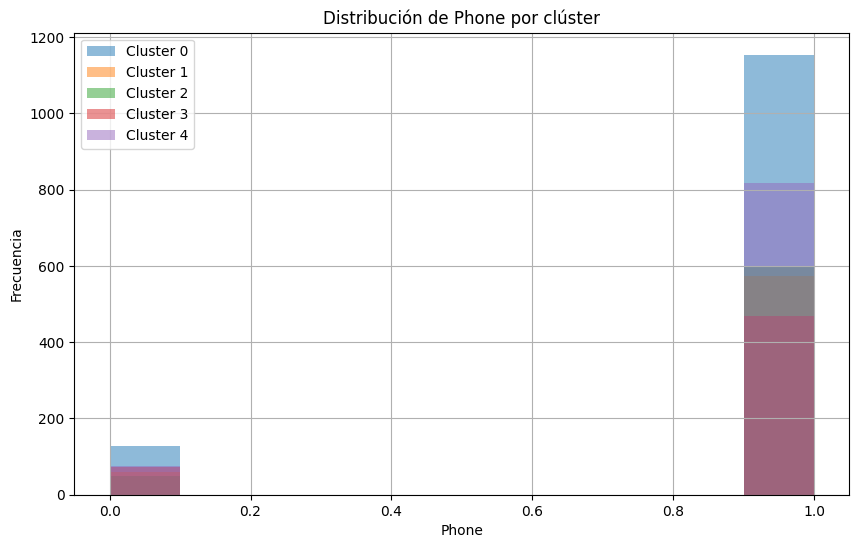

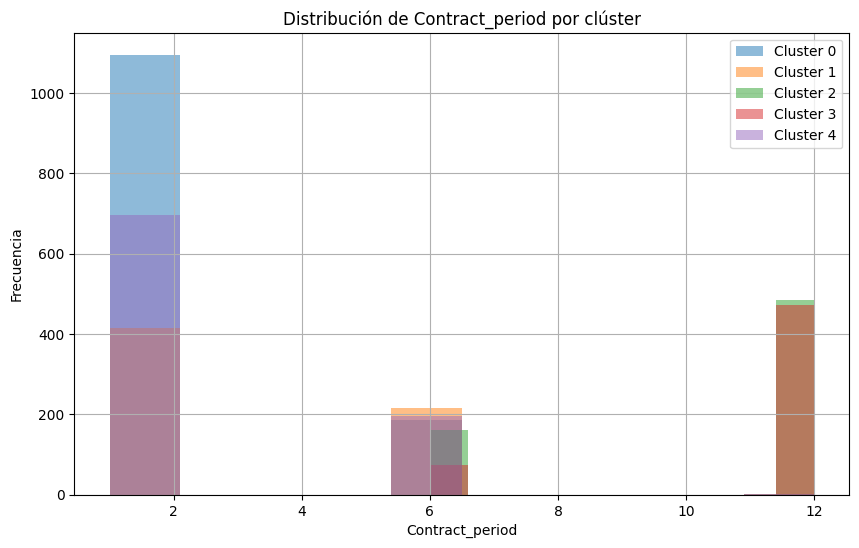

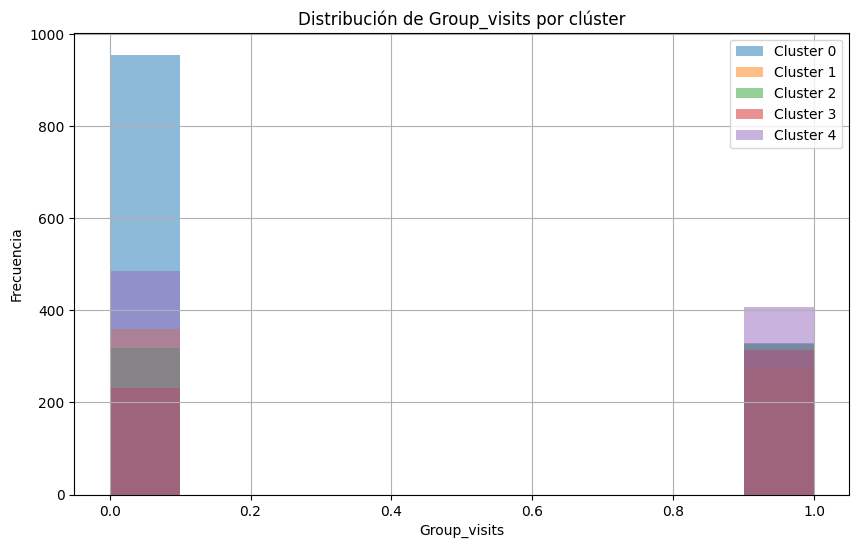

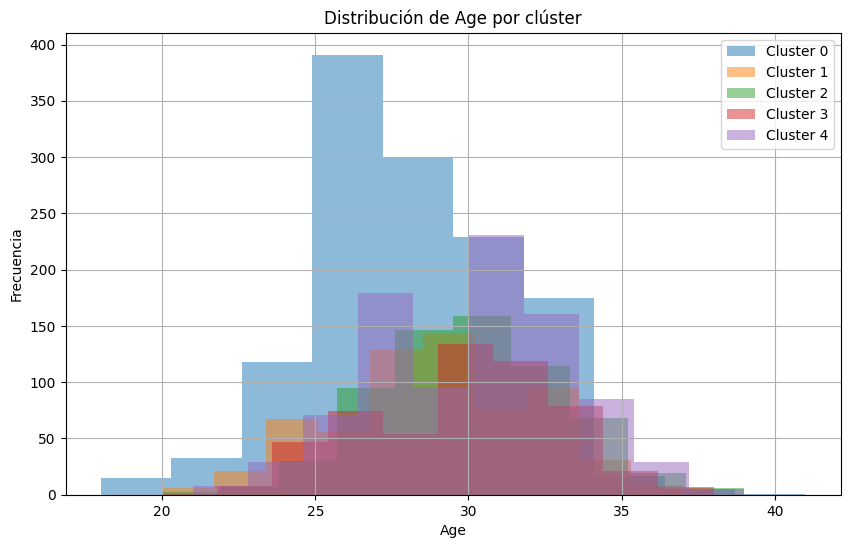

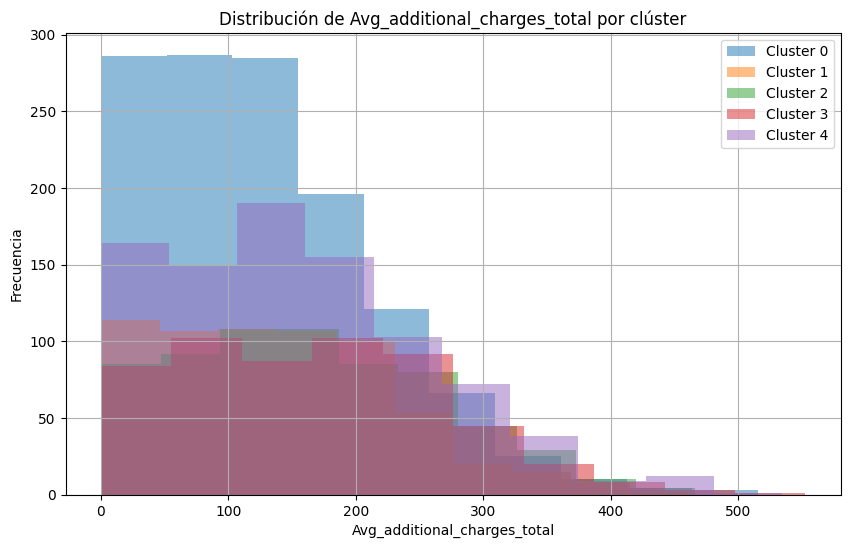

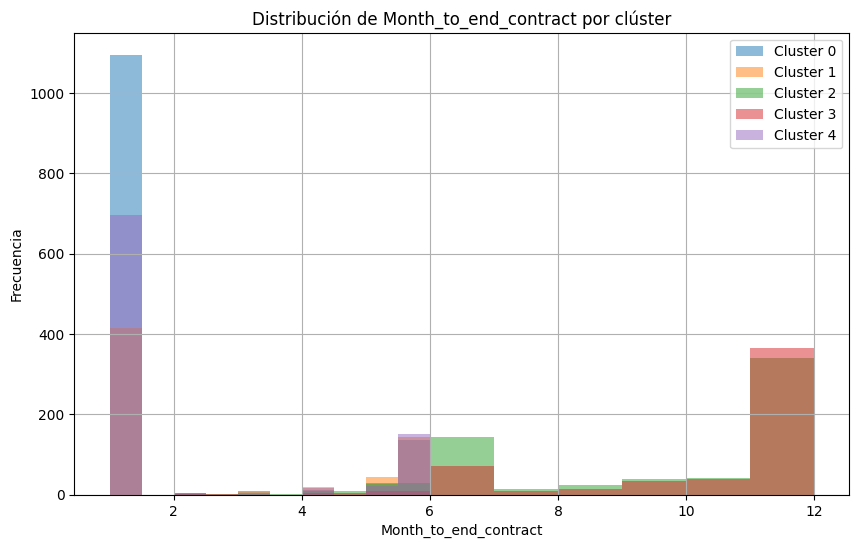

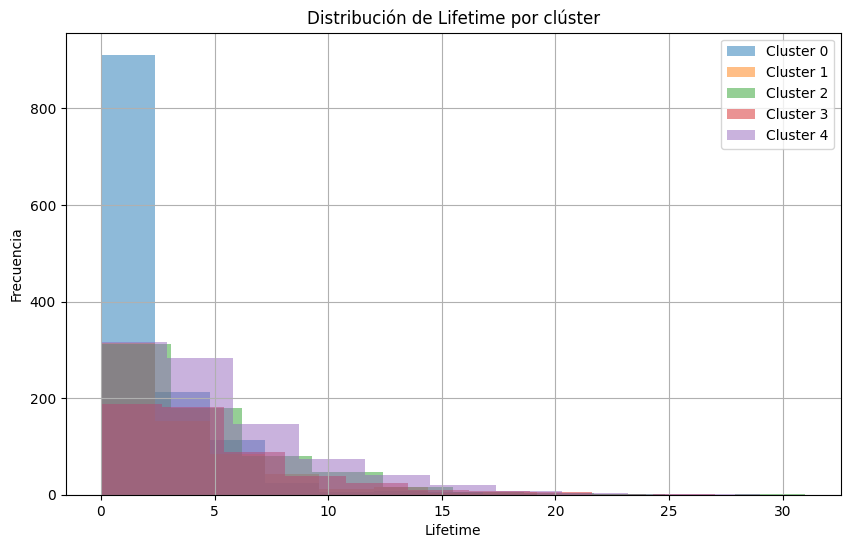

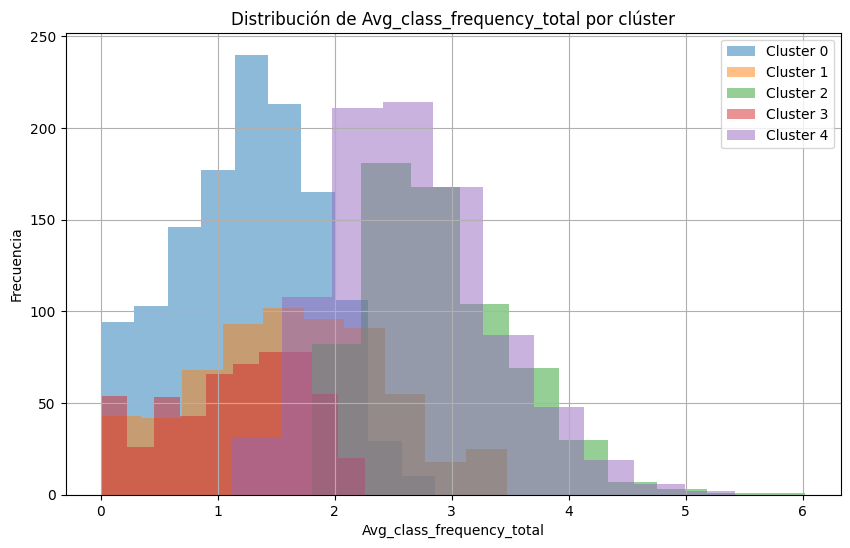

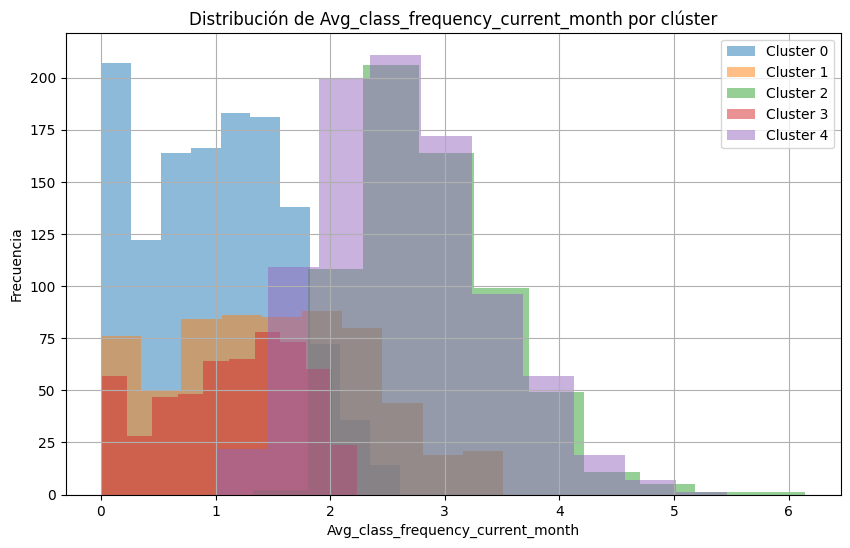


Tasa de cancelación por clúster:
Cluster
0    0.587685
1    0.285940
2    0.013932
3    0.042279
4    0.105145
Name: Churn, dtype: float64

Patrones detectados:
El clúster 0 tiene una alta tasa de cancelación (0.59).
El clúster 1 es más leal (0.29).
El clúster 2 es más leal (0.01).
El clúster 3 es más leal (0.04).
El clúster 4 es más leal (0.11).


In [5]:
# Paso 1: Eliminar la columna de cancelación y estandarizar los datos
features = df.drop(columns=['Churn'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Paso 2: Crear una matriz de distancias y trazar el dendrograma
linked = linkage(features_scaled, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linked)
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()

# Paso 3: Entrenar el modelo de clustering con K-means
n_clusters = 5  # Usar n=5 como se indica en las instrucciones
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Agregar los clústeres al dataframe original
df['Cluster'] = clusters

# Paso 4: Calcular valores medios de las características por clúster
cluster_means = df.groupby('Cluster').mean()

# Mostrar valores medios por clúster
print("Valores medios por clúster:")
print(cluster_means)

# Paso 5: Graficar distribuciones de características por clúster
for column in features.columns:
    plt.figure(figsize=(10, 6))
    for cluster in range(n_clusters):
        cluster_data = df[df['Cluster'] == cluster][column]
        cluster_data.hist(alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'Distribución de {column} por clúster')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

# Paso 6: Calcular la tasa de cancelación por clúster
churn_rate_by_cluster = df.groupby('Cluster')['Churn'].mean()
print("\nTasa de cancelación por clúster:")
print(churn_rate_by_cluster)

# Identificar patrones
print("\nPatrones detectados:")
for cluster, churn_rate in churn_rate_by_cluster.items():
    if churn_rate > 0.5:
        print(f"El clúster {cluster} tiene una alta tasa de cancelación ({churn_rate:.2f}).")
    else:
        print(f"El clúster {cluster} es más leal ({churn_rate:.2f}).")

PATRONES
- Los clústeres con contratos más largos (Clúster 2 y Clúster 3) tienden a tener una mayor lealtad, mostrando tasas de cancelación muy bajas. Esto sugiere que ofrecer incentivos para contratos más prolongados puede ayudar a retener usuarios.
- La participación en clases grupales y la frecuencia de uso del gimnasio están fuertemente asociadas con la lealtad de los usuarios.
- Los usuarios referidos por promociones como "amigos" (Clúster 1) tienen una lealtad intermedia. Este grupo podría beneficiarse de estrategias que aumenten su participación y frecuencia de uso.

RECOMENDACIONES
- Incentivar contratos a largo plazo: Ofrecer descuentos o beneficios adicionales a los usuarios que opten por contratos más prolongados podría aumentar la lealtad.
- Fomentar la participación en clases grupales: Diseñar programas personalizados o promociones para clases grupales podría motivar la participación, especialmente en los clústeres 0 y 1.
- Estrategias específicas para el Clúster 0:
- Realizar encuestas para identificar razones de cancelación (e.g., falta de tiempo, desinterés).
- Crear promociones atractivas para que los usuarios prueben más servicios, como clases grupales o entrenamientos personalizados.
- Aprovechar el efecto de las recomendaciones: Los usuarios referidos (Clúster 1) tienen mayor potencial de lealtad si se les motiva con experiencias personalizadas y actividades que aumenten su conexión con el gimnasio.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Excelente análisis de clústeres y patrones detectados! Tus observaciones sobre las tasas de cancelación y las recomendaciones para estrategias específicas son claras y accionables. Las visualizaciones también ayudan a respaldar tus conclusiones. ¡Muy bien hecho! </div>

## Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

1. Enfocarse en los contratos a largo plazo
- Conclusión: Los usuarios con contratos más largos (Clústeres 2 y 3) tienen tasas de cancelación significativamente más bajas (1.4% y 4.2%). Esto indica que los contratos prolongados fomentan el compromiso.
- Recomendación:Ofrecer descuentos o beneficios adicionales (p. ej., sesiones de entrenamiento personal gratuitas o acceso exclusivo a clases) para contratos de 6 meses o más.
Crear campañas promocionales específicas, como "Suscríbete por un año y ahorra un 20%".
2. Promover la participación en actividades grupales
- Conclusión: La frecuencia de asistencia a clases grupales y la interacción social están asociadas con una mayor retención. Los clústeres más leales (Clústeres 2 y 3) muestran alta participación en estas actividades.
- Recomendación: Organizar retos o eventos grupales mensuales, como "Semana de fitness en grupo" con premios para los participantes más activos.
Ofrecer descuentos a los usuarios que se inscriban a múltiples clases grupales o que traigan amigos.
3. Recuperar clientes con alto riesgo de cancelación
Conclusión: Los usuarios del Clúster 0 tienen la tasa de cancelación más alta (58.8%). Esto sugiere desinterés o desconexión con el servicio.
Recomendación:
Implementar alertas de inactividad: si un usuario no asiste al gimnasio durante dos semanas, enviar correos electrónicos personalizados con ofertas, como "Te extrañamos, vuelve esta semana y obtén una clase gratis".
Realizar encuestas para entender las razones de su baja participación y ajustar los servicios según sus necesidades.
4. Aprovechar las recomendaciones de clientes existentes
Conclusión: El Clúster 1 muestra un buen potencial de retención gracias a su alta participación en promociones como "amigos referidos".
Recomendación:
Crear un programa formal de referidos: por ejemplo, "Por cada amigo que invites, obtén un mes gratis".
Incentivar a los nuevos usuarios con descuentos exclusivos si se registran como parte de un referido.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Gran trabajo sintetizando conclusiones y recomendaciones prácticas! Las estrategias propuestas están claramente alineadas con los patrones detectados en el análisis y ofrecen acciones específicas para mejorar la retención de clientes. ¡Excelente cierre! </div>

# Comentario general del revisor 


<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
¡Felicidades Daniel! Tu proyecto está **aprobado**. Has demostrado un excelente manejo de los datos, análisis detallado, y conclusiones bien fundamentadas. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:

Puntos Positivos:
- **Análisis exploratorio completo:** Identificaste patrones clave en el comportamiento de los clientes y exploraste correlaciones importantes.
- **Modelos predictivos bien ejecutados:** Comparaste y evaluaste modelos con métricas relevantes, mostrando un enfoque analítico sólido.
- **Clustering y segmentación efectiva:** Creaste clústeres interpretables y extraíste conclusiones accionables para estrategias específicas de retención.
- **Recomendaciones claras:** Propuestas estratégicas basadas en datos, con acciones específicas para cada segmento identificado.

Áreas para Seguir Investigando:
- **Optimización de modelos:** Experimentar con técnicas avanzadas de modelado o hiperparametrización para mejorar aún más las métricas predictivas.
- **Análisis temporal:** Explorar tendencias a lo largo del tiempo para identificar posibles estacionalidades en el comportamiento de los clientes.
- **Evaluación post-implementación:** Medir el impacto de las estrategias sugeridas, como campañas de referidos o incentivos de contratos, en la retención real de clientes.

¡Sigue así! Tus habilidades analíticas y capacidad para generar recomendaciones accionables son destacables. 🚀💪😊
</div>
